Name: Mario Fabelo Ozcáriz

# AstroLab Assignment 1: Transiting Extrasolar Planets

Data is simulated for a star-planet system with a circular orbit.

The target star is a main-sequence M-star with $M_{\star} =0.102 M_{⊙}$, radius $R_{\star} = 0.137R_{⊙}$, surface temperature $T_{\star} = 2800 K$ and period $P = 1.14172354 \ \text{days}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit


T_star = 2800  # K
R_star = 0.137 * 6.957e+8 # R sun
M_star = 0.102 * 1.989e+30  # M sun
P = 1.14172354  # days
G = 6.6743e-11  # m^3 kg^-1 s^-2

## Task 1:
Download the RV data. This consists of time-series spectra, labelled ‘spectrum_1',‘spectrum_2’, etc. The corresponding wavelength array [in Å] and velocity array [in $m/s$ ]can be found in ‘wavelength’ and ‘velocity’, respectively. The time stamps for each spectrum can be found in ‘time_BJD_1' , ‘time_BJD_2’, etc [in Barycentric Julian Date/ BJD].

Finally, a spectral template can be found as ‘spec_template’. First, determine the number of spectra in the dataset, and organise the data into a suitable format. You may also want to plot up sub-sets of the data to check its format.

In [ ]:
# Load RV data
rv_data = np.load("/content/JSAstroLab2024_25_rv_data_22340134.npz")

# Print contents of RV data
print(f"Keys of rv_data: {rv_data.files}")  # contains keys: wavelength, velocity, spec_template, spectrum_1, time_BJD_1 and continues with pairs of spectrum and time

# Extract wavelength, velocity, spec_template arrays
wavelength, velocity, spec_template = rv_data["wavelength"], rv_data["velocity"], rv_data["spec_template"]

velocity = velocity[55000:57000]

# Print the shapes of the arrays
print(f"Shape of wavelength: {wavelength.shape}")
print(f"Shape of velocity: {velocity.shape}")
print(f"Shape of spec_template: {spec_template.shape}")  # All have same shape of (111924,)

# Determine number of spectra in dataset
num_spectra = len(rv_data.files[3:]) // 2  # from index 3 to end there are pairs of columns of spectrum and time arrays
print(f"Number of spectra: {num_spectra}")

# Organise data into suitable format
spectra = []
times_BJD = []

for i in range(3, len(rv_data.files), 2):
    spectrum_key = rv_data.files[i]  # spectrum key
    time_key = rv_data.files[i + 1]  # time key
    spectra.append(rv_data[spectrum_key])
    times_BJD.append(rv_data[time_key])

# Convert spectra and times_BJD lists to a NumPy arrays
spectra = np.array(spectra)
times_BJD = np.array(times_BJD)


# Cross Correlate
def correlate(x):
    return np.correlate(spectra[x] - np.mean(spectra[x]), spec_template - np.mean(spec_template), mode='same')[55000:57000]


correlation_results = []

for i in range(num_spectra):
    correlation_results.append(correlate(i))

correlation_results = np.array(correlation_results)

Keys of rv_data: ['wavelength', 'velocity', 'spec_template', 'spectrum_1', 'time_BJD_1', 'spectrum_2', 'time_BJD_2', 'spectrum_3', 'time_BJD_3', 'spectrum_4', 'time_BJD_4', 'spectrum_5', 'time_BJD_5', 'spectrum_6', 'time_BJD_6', 'spectrum_7', 'time_BJD_7', 'spectrum_8', 'time_BJD_8', 'spectrum_9', 'time_BJD_9', 'spectrum_10', 'time_BJD_10', 'spectrum_11', 'time_BJD_11', 'spectrum_12', 'time_BJD_12', 'spectrum_13', 'time_BJD_13', 'spectrum_14', 'time_BJD_14', 'spectrum_15', 'time_BJD_15', 'spectrum_16', 'time_BJD_16', 'spectrum_17', 'time_BJD_17', 'spectrum_18', 'time_BJD_18', 'spectrum_19', 'time_BJD_19', 'spectrum_20', 'time_BJD_20', 'spectrum_21', 'time_BJD_21', 'spectrum_22', 'time_BJD_22', 'spectrum_23', 'time_BJD_23', 'spectrum_24', 'time_BJD_24', 'spectrum_25', 'time_BJD_25', 'spectrum_26', 'time_BJD_26', 'spectrum_27', 'time_BJD_27', 'spectrum_28', 'time_BJD_28', 'spectrum_29', 'time_BJD_29', 'spectrum_30', 'time_BJD_30', 'spectrum_31', 'time_BJD_31', 'spectrum_32', 'time_BJD_32

Cross Correlation 1
Optimization terminated successfully.
         Current function value: 510945.192096
         Iterations: 328
         Function evaluations: 614
chi2 = 510945.1920961877
p[0] = 46337317.766656+-175168.046488
p[1] = -10438.845631+-63.224986
p[2] = 14676.513661+-63.506001
p[3] = -2.552378+-0.362147
red chi2 = 1.0020040080221142
stdev = 15.983510129132894


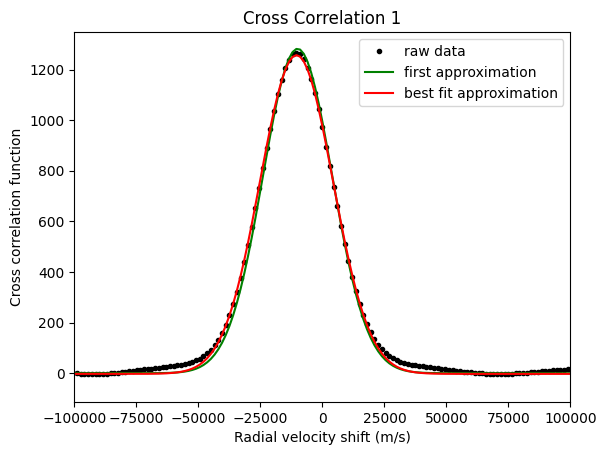

Cross Correlation 2
Optimization terminated successfully.
         Current function value: 507670.714438
         Iterations: 302
         Function evaluations: 567
chi2 = 507670.7144379267
p[0] = 46316387.214970+-174584.926519
p[1] = -10448.870725+-63.028478
p[2] = 14673.088723+-63.308552
p[3] = -2.557809+-0.360983
red chi2 = 1.0020040080219923
stdev = 15.932211309763733


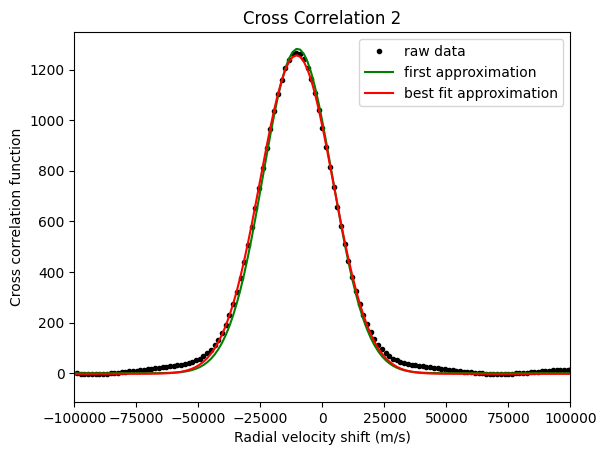

Cross Correlation 3
Optimization terminated successfully.
         Current function value: 509648.470059
         Iterations: 297
         Function evaluations: 541
chi2 = 509648.4700589649
p[0] = 46313571.219443+-174921.243895
p[1] = -10471.501881+-63.151355
p[2] = 14672.528832+-63.431962
p[3] = -2.548709+-0.361686
red chi2 = 1.0020040080214005
stdev = 15.963215059300632


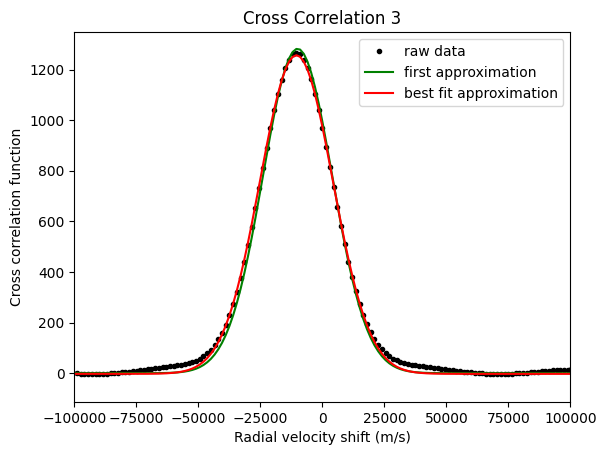

Cross Correlation 4
Optimization terminated successfully.
         Current function value: 513569.311790
         Iterations: 340
         Function evaluations: 609
chi2 = 513569.3117898687
p[0] = 46304496.208588+-175598.868842
p[1] = -10465.315067+-63.412628
p[2] = 14673.515457+-63.694417
p[3] = -2.518999+-0.363075
red chi2 = 1.0020040080221653
stdev = 16.02450173624548


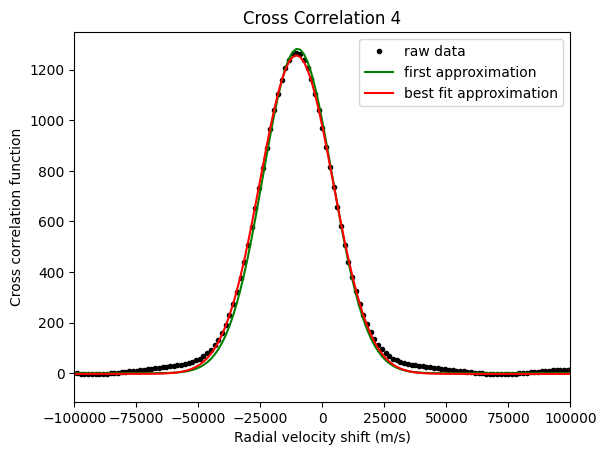

Cross Correlation 5
Optimization terminated successfully.
         Current function value: 510297.939468
         Iterations: 326
         Function evaluations: 596
chi2 = 510297.9394679231
p[0] = 46328965.300756+-175065.712368
p[1] = -10456.152714+-63.205440
p[2] = 14677.925726+-63.486395
p[3] = -2.521041+-0.361918
red chi2 = 1.0020040080221255
stdev = 15.973383164939154


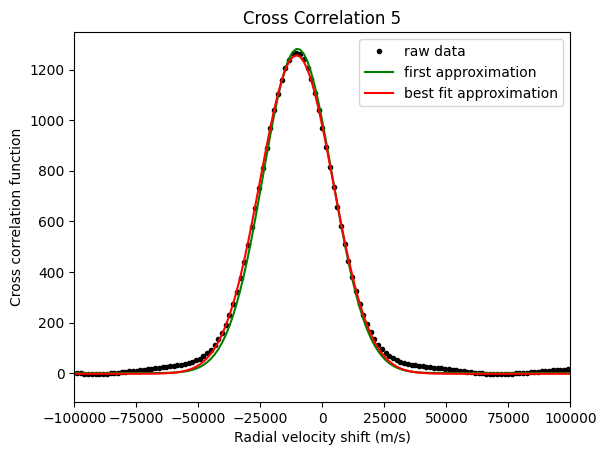

Cross Correlation 6
Optimization terminated successfully.
         Current function value: 509390.375591
         Iterations: 320
         Function evaluations: 592
chi2 = 509390.375590818
p[0] = 46303369.327045+-174867.809626
p[1] = -10448.818533+-63.139632
p[2] = 14671.035440+-63.420159
p[3] = -2.550857+-0.361594
red chi2 = 1.002004008021796
stdev = 15.9591725285307


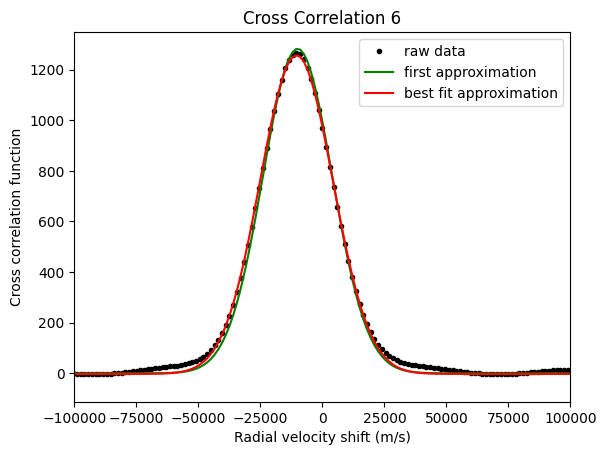

Cross Correlation 7
Optimization terminated successfully.
         Current function value: 510287.976524
         Iterations: 396
         Function evaluations: 707
chi2 = 510287.9765239934
p[0] = 46313740.028296+-175036.790920
p[1] = -10435.447170+-63.196888
p[2] = 14673.481436+-63.477718
p[3] = -2.588107+-0.361913
red chi2 = 1.0020040080221462
stdev = 15.973227233780802


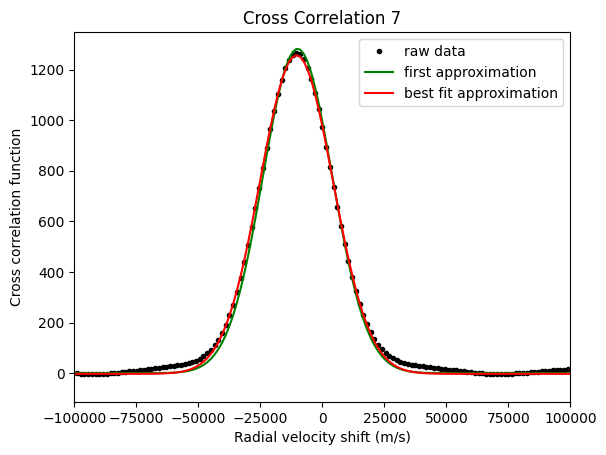

Cross Correlation 8
Optimization terminated successfully.
         Current function value: 509158.023014
         Iterations: 362
         Function evaluations: 656
chi2 = 509158.0230143141
p[0] = 46300398.500861+-174838.439708
p[1] = -10440.882039+-63.140377
p[2] = 14672.754479+-63.420941
p[3] = -2.538423+-0.361512
red chi2 = 1.002004008022343
stdev = 15.95553231663416


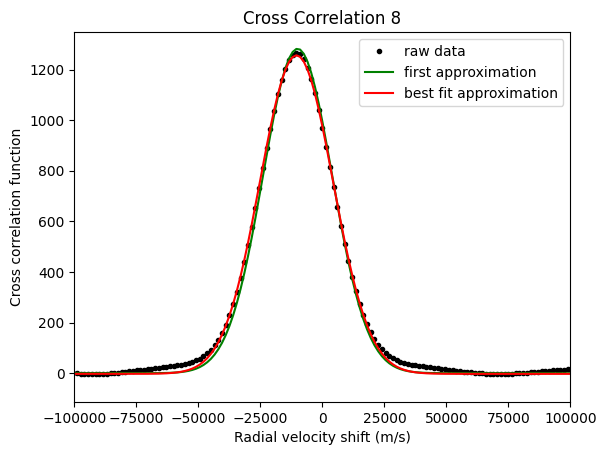

Cross Correlation 9
Optimization terminated successfully.
         Current function value: 512041.741141
         Iterations: 319
         Function evaluations: 589
chi2 = 512041.7411405128
p[0] = 46333594.263691+-175373.077298
p[1] = -10426.756325+-63.315988
p[2] = 14679.312485+-63.597462
p[3] = -2.545021+-0.362536
red chi2 = 1.0020040080227075
stdev = 16.000652192028188


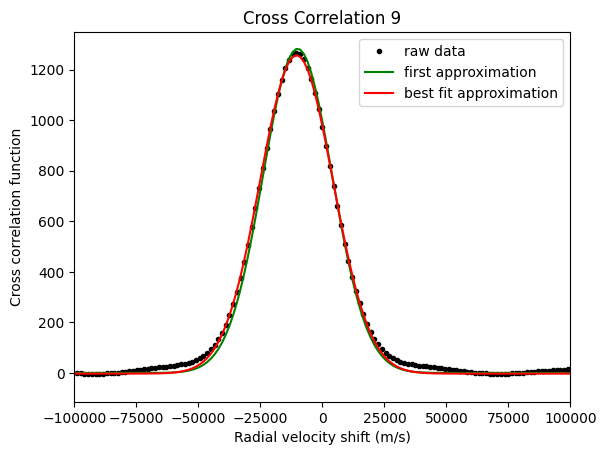

Cross Correlation 10
Optimization terminated successfully.
         Current function value: 510025.125206
         Iterations: 333
         Function evaluations: 602
chi2 = 510025.1252055508
p[0] = 46296082.827682+-174970.208818
p[1] = -10422.087802+-63.182028
p[2] = 14669.971348+-63.462722
p[3] = -2.508893+-0.361818
red chi2 = 1.002004008022257
stdev = 15.96911276817768


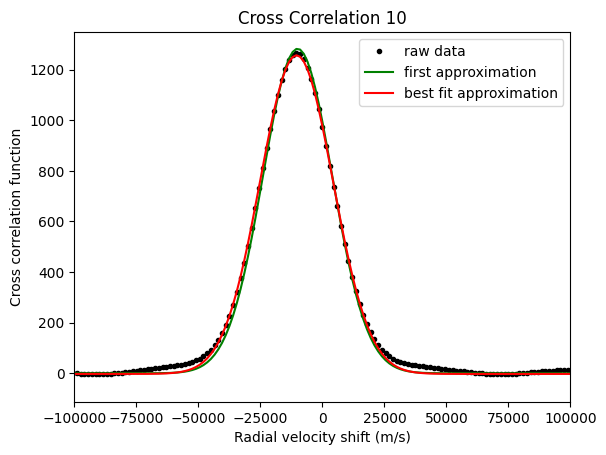

Cross Correlation 11
Optimization terminated successfully.
         Current function value: 508862.769219
         Iterations: 294
         Function evaluations: 552
chi2 = 508862.7692190041
p[0] = 46312070.174004+-174801.932439
p[1] = -10417.400471+-63.121138
p[2] = 14675.076283+-63.401663
p[3] = -2.566237+-0.361408
red chi2 = 1.0020040080226635
stdev = 15.950905447951914


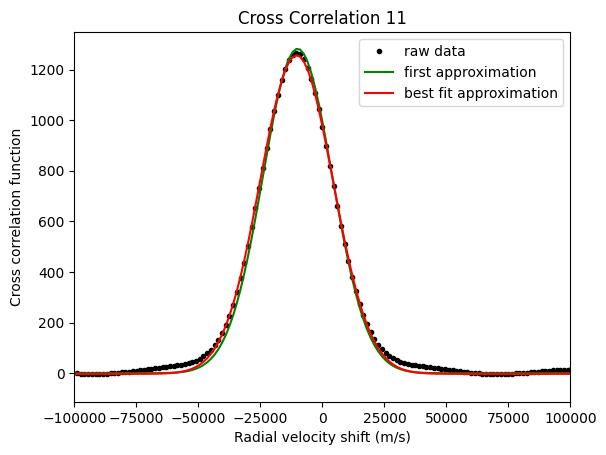

Cross Correlation 12
Optimization terminated successfully.
         Current function value: 509137.746959
         Iterations: 311
         Function evaluations: 585
chi2 = 509137.7469589396
p[0] = 46290214.402956+-174816.880940
p[1] = -10420.863809+-63.133931
p[2] = 14669.799094+-63.414408
p[3] = -2.536447+-0.361504
red chi2 = 1.0020040080222388
stdev = 15.955214617154788


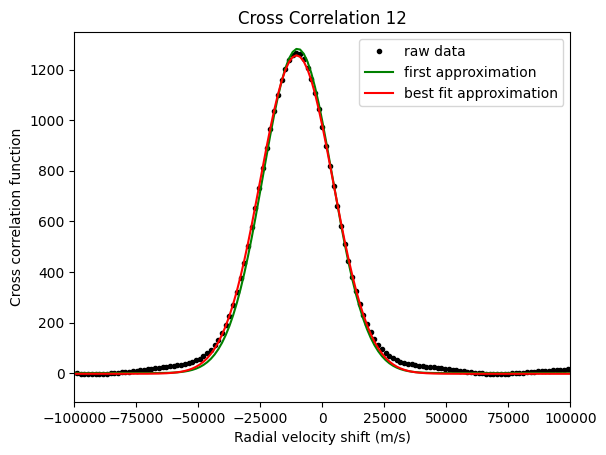

Cross Correlation 13
Optimization terminated successfully.
         Current function value: 509220.977058
         Iterations: 311
         Function evaluations: 584
chi2 = 509220.9770580498
p[0] = 46308420.446525+-174877.433558
p[1] = -10403.901923+-63.163088
p[2] = 14677.362975+-63.443844
p[3] = -2.515787+-0.361536
red chi2 = 1.002004008022516
stdev = 15.956518684507122


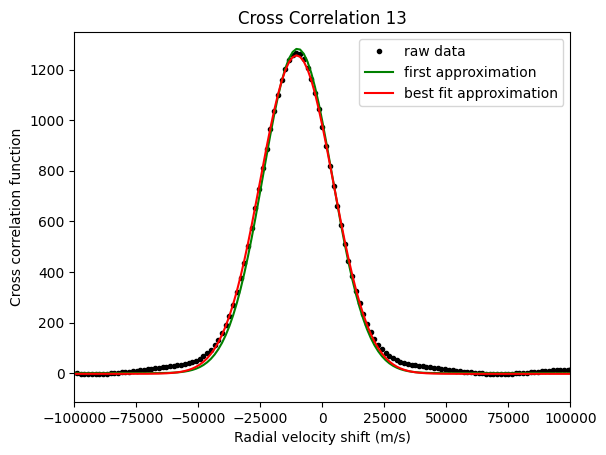

Cross Correlation 14
Optimization terminated successfully.
         Current function value: 510483.300272
         Iterations: 320
         Function evaluations: 572
chi2 = 510483.30027152505
p[0] = 46297560.403122+-175070.094849
p[1] = -10398.985439+-63.230871
p[2] = 14673.450398+-63.511851
p[3] = -2.560902+-0.361982
red chi2 = 1.0020040080225106
stdev = 15.976283990207564


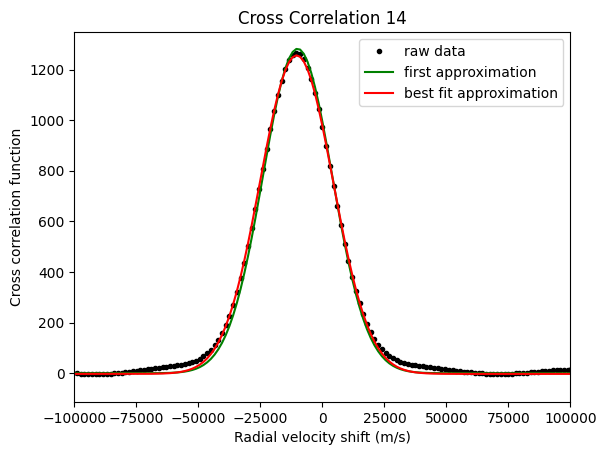

Cross Correlation 15
Optimization terminated successfully.
         Current function value: 509881.662952
         Iterations: 317
         Function evaluations: 584
chi2 = 509881.6629515178
p[0] = 46311342.306019+-174992.131107
p[1] = -10393.392601+-63.201413
p[2] = 14677.572160+-63.482342
p[3] = -2.510332+-0.361770
red chi2 = 1.0020040080224453
stdev = 15.966866676832964


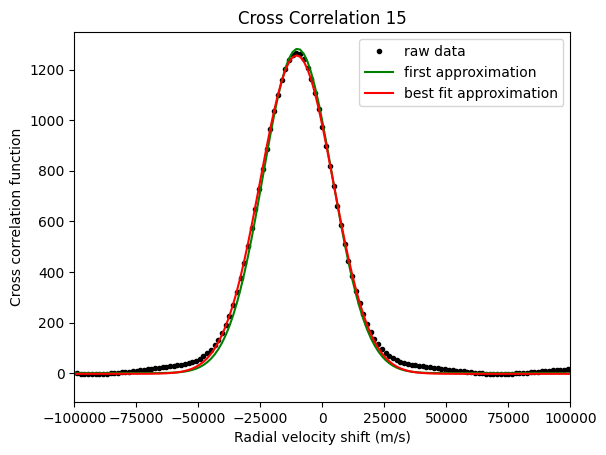

Cross Correlation 16
Optimization terminated successfully.
         Current function value: 509154.114920
         Iterations: 352
         Function evaluations: 639
chi2 = 509154.1149196173
p[0] = 46312905.803891+-174864.185419
p[1] = -10393.986082+-63.150950
p[2] = 14677.072568+-63.431645
p[3] = -2.493705+-0.361512
red chi2 = 1.0020040080226975
stdev = 15.955471082353183


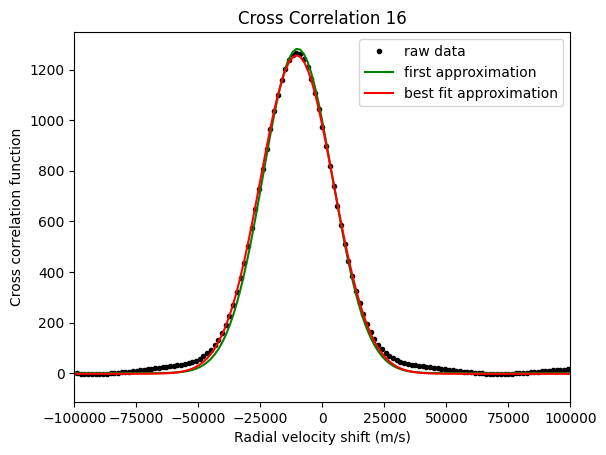

Cross Correlation 17
Optimization terminated successfully.
         Current function value: 507602.012785
         Iterations: 330
         Function evaluations: 596
chi2 = 507602.01278507337
p[0] = 46293412.499902+-174552.373000
p[1] = -10409.167286+-63.033593
p[2] = 14669.691341+-63.313622
p[3] = -2.563758+-0.360958
red chi2 = 1.0020040080222201
stdev = 15.931133242570558


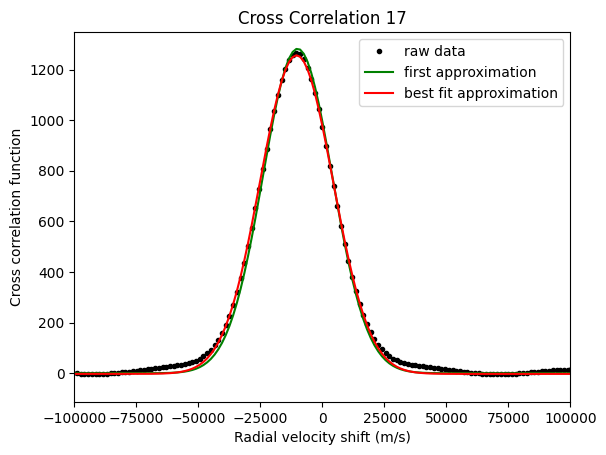

Cross Correlation 18
Optimization terminated successfully.
         Current function value: 509549.214602
         Iterations: 319
         Function evaluations: 586
chi2 = 509549.21460220235
p[0] = 46314834.638418+-174918.697337
p[1] = -10411.647348+-63.158769
p[2] = 14674.896741+-63.439456
p[3] = -2.536862+-0.361651
red chi2 = 1.0020040080225854
stdev = 15.961660543348904


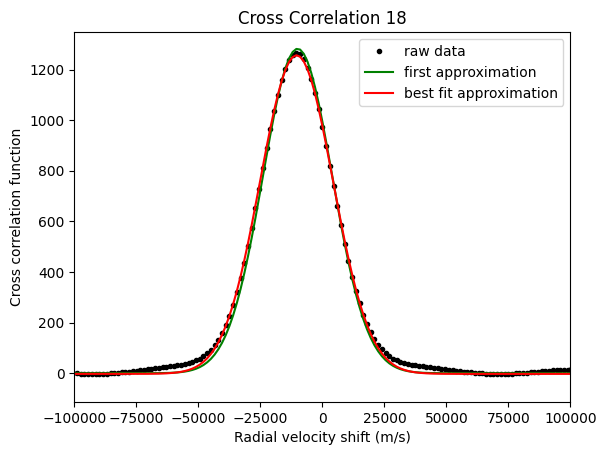

Cross Correlation 19
Optimization terminated successfully.
         Current function value: 510466.640580
         Iterations: 324
         Function evaluations: 582
chi2 = 510466.64057955623
p[0] = 46296427.978333+-175050.817295
p[1] = -10418.097053+-63.214057
p[2] = 14670.769421+-63.494909
p[3] = -2.557702+-0.361975
red chi2 = 1.0020040080221653
stdev = 15.97602329397958


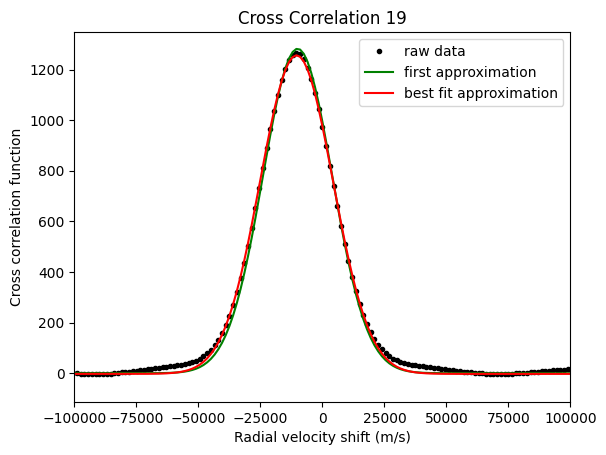

Cross Correlation 20
Optimization terminated successfully.
         Current function value: 512315.944518
         Iterations: 302
         Function evaluations: 569
chi2 = 512315.94451761246
p[0] = 46309279.221936+-175386.700011
p[1] = -10407.882095+-63.331020
p[2] = 14673.879931+-63.612454
p[3] = -2.542929+-0.362631
red chi2 = 1.0020040080224297
stdev = 16.00493587174926


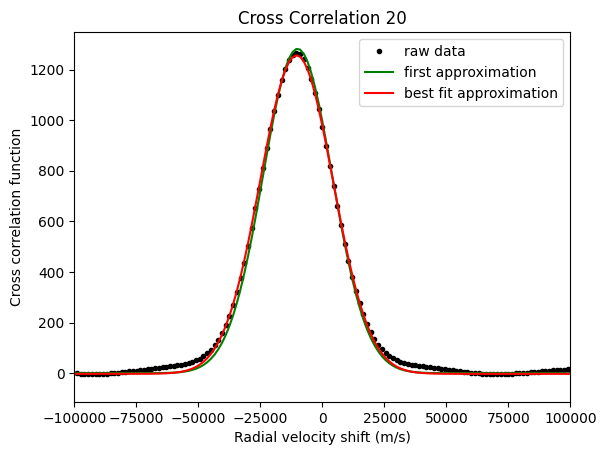

Cross Correlation 21
Optimization terminated successfully.
         Current function value: 511080.876220
         Iterations: 310
         Function evaluations: 569
chi2 = 511080.8762197378
p[0] = 46320509.098867+-175210.301951
p[1] = -10422.848663+-63.276370
p[2] = 14679.613728+-63.557674
p[3] = -2.541002+-0.362196
red chi2 = 1.002004008022854
stdev = 15.985632239916848


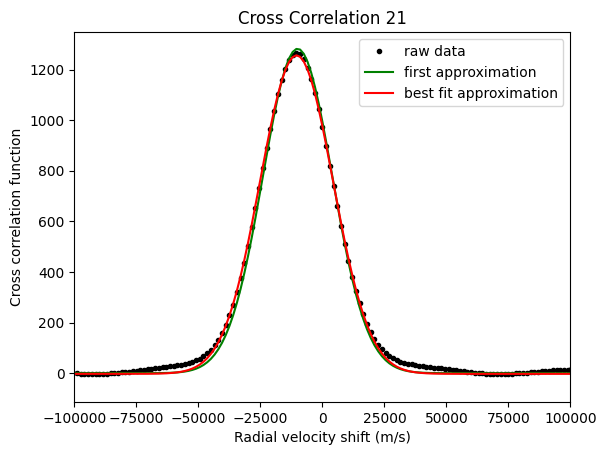

Cross Correlation 22
Optimization terminated successfully.
         Current function value: 511389.838076
         Iterations: 329
         Function evaluations: 606
chi2 = 511389.838076076
p[0] = 46325034.687334+-175272.711083
p[1] = -10444.440769+-63.299292
p[2] = 14681.157084+-63.580726
p[3] = -2.548464+-0.362306
red chi2 = 1.002004008023075
stdev = 15.990463377839868


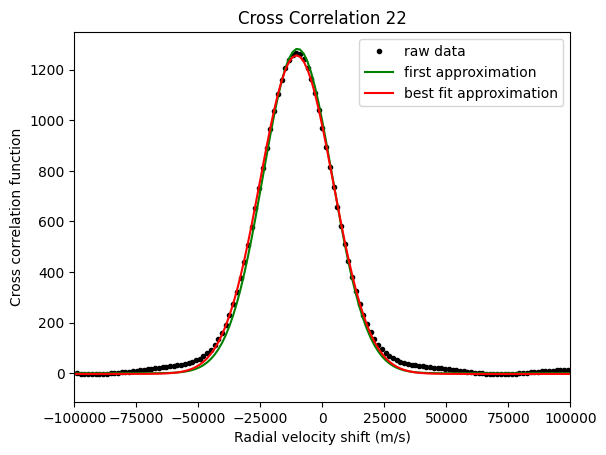

Cross Correlation 23
Optimization terminated successfully.
         Current function value: 512383.754136
         Iterations: 310
         Function evaluations: 585
chi2 = 512383.7541361534
p[0] = 46291687.620747+-175365.676482
p[1] = -10444.125836+-63.324843
p[2] = 14668.562502+-63.606144
p[3] = -2.528361+-0.362654
red chi2 = 1.0020040080220687
stdev = 16.00599503523841


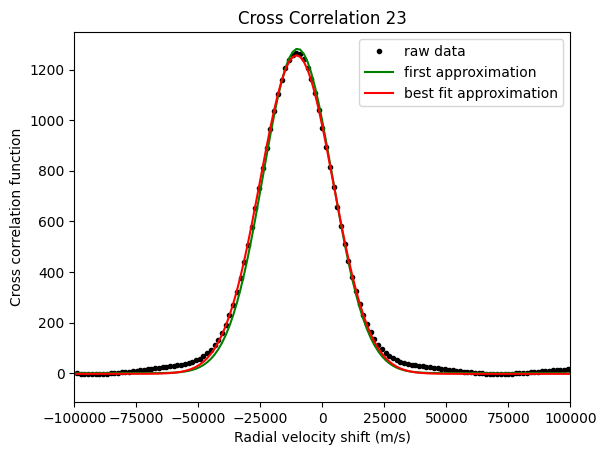

Cross Correlation 24
Optimization terminated successfully.
         Current function value: 510553.239071
         Iterations: 294
         Function evaluations: 542
chi2 = 510553.2390705454
p[0] = 46314155.134112+-175094.941814
p[1] = -10459.730478+-63.226105
p[2] = 14675.548876+-63.507105
p[3] = -2.501406+-0.362008
red chi2 = 1.002004008022525
stdev = 15.97737836865838


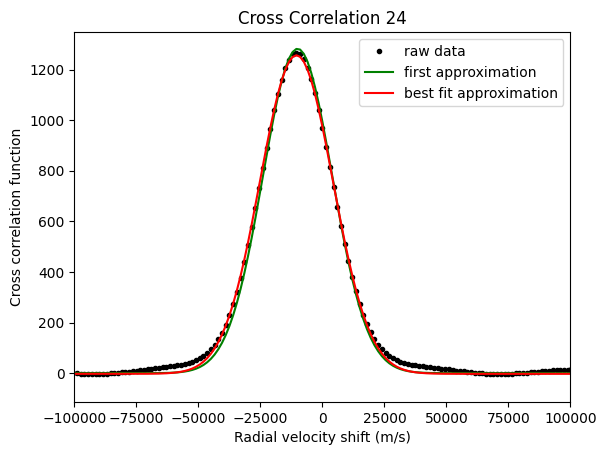

Cross Correlation 25
Optimization terminated successfully.
         Current function value: 511101.936367
         Iterations: 379
         Function evaluations: 695
chi2 = 511101.93636731943
p[0] = 46325318.124207+-175216.333062
p[1] = -10471.416706+-63.273657
p[2] = 14680.008445+-63.554955
p[3] = -2.603127+-0.362204
red chi2 = 1.0020040080223673
stdev = 15.985961597090734


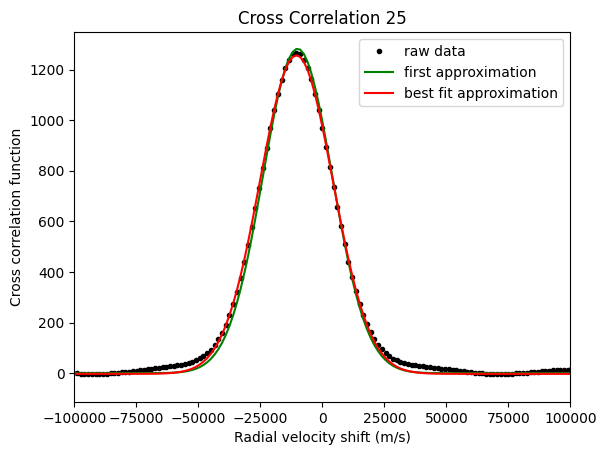

Cross Correlation 26
Optimization terminated successfully.
         Current function value: 511248.787970
         Iterations: 324
         Function evaluations: 593
chi2 = 511248.7879698464
p[0] = 46295958.417171+-175163.833240
p[1] = -10461.148967+-63.240909
p[2] = 14667.337196+-63.521814
p[3] = -2.523010+-0.362251
red chi2 = 1.0020040080216335
stdev = 15.988258003451259


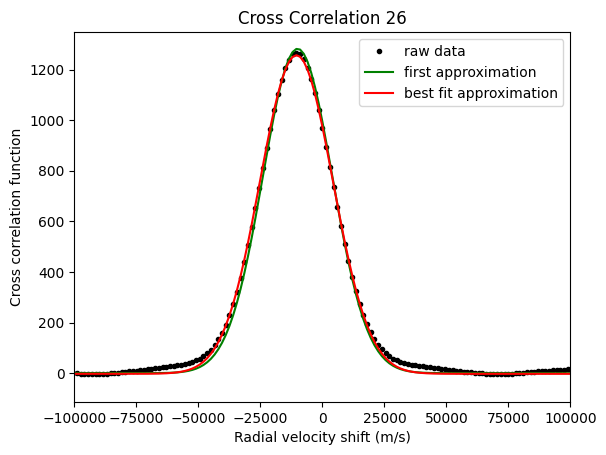

Cross Correlation 27
Optimization terminated successfully.
         Current function value: 508284.549918
         Iterations: 304
         Function evaluations: 565
chi2 = 508284.54991778696
p[0] = 46290763.358814+-174684.195825
p[1] = -10468.082236+-63.094883
p[2] = 14672.065781+-63.375231
p[3] = -2.541987+-0.361201
red chi2 = 1.002004008021812
stdev = 15.941840388076074


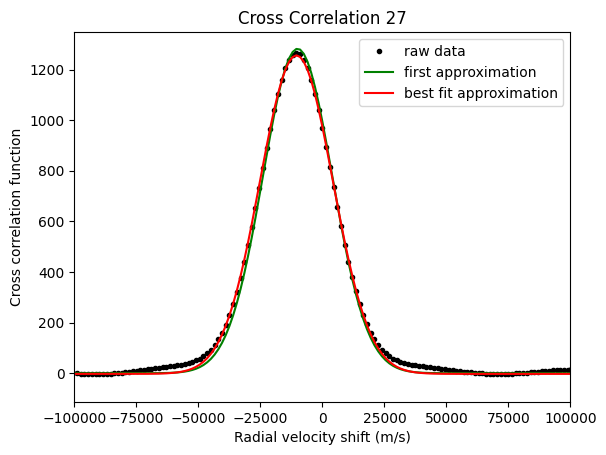

Cross Correlation 28
Optimization terminated successfully.
         Current function value: 512727.363258
         Iterations: 316
         Function evaluations: 571
chi2 = 512727.3632575949
p[0] = 46324123.501127+-175461.207981
p[1] = -10461.955101+-63.340466
p[2] = 14674.547853+-63.621955
p[3] = -2.544272+-0.362777
red chi2 = 1.0020040080219177
stdev = 16.01136101737755


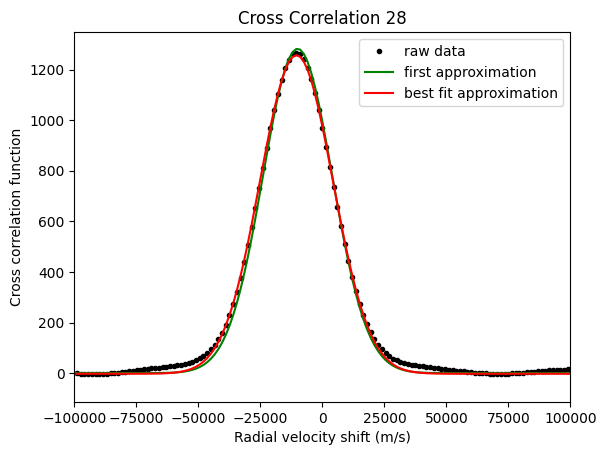

Cross Correlation 29
Optimization terminated successfully.
         Current function value: 509094.350589
         Iterations: 322
         Function evaluations: 589
chi2 = 509094.35058928485
p[0] = 46321823.740875+-174842.346509
p[1] = -10452.484830+-63.122882
p[2] = 14675.181042+-63.403416
p[3] = -2.504030+-0.361490
red chi2 = 1.0020040080227244
stdev = 15.954534631089759


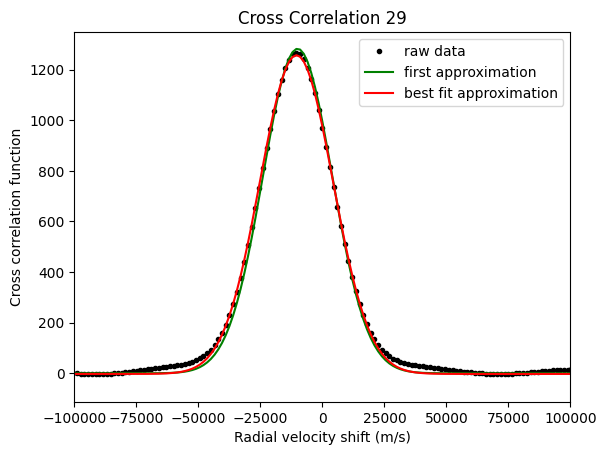

Cross Correlation 30
Optimization terminated successfully.
         Current function value: 511913.910619
         Iterations: 316
         Function evaluations: 582
chi2 = 511913.91061925166
p[0] = 46304617.714324+-175331.534457
p[1] = -10439.795825+-63.326953
p[2] = 14676.107005+-63.608412
p[3] = -2.513846+-0.362490
red chi2 = 1.0020040080225912
stdev = 15.998654796876702


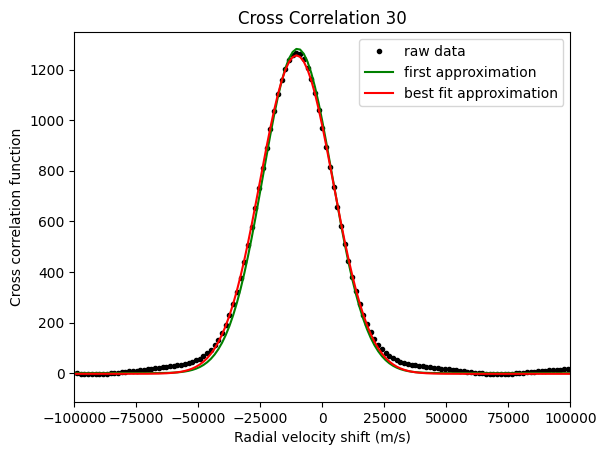

Cross Correlation 31
Optimization terminated successfully.
         Current function value: 511188.470475
         Iterations: 298
         Function evaluations: 545
chi2 = 511188.4704749723
p[0] = 46307300.860764+-175192.551132
p[1] = -10430.146019+-63.262883
p[2] = 14673.707772+-63.544010
p[3] = -2.519362+-0.362232
red chi2 = 1.0020040080222707
stdev = 15.98731482261753


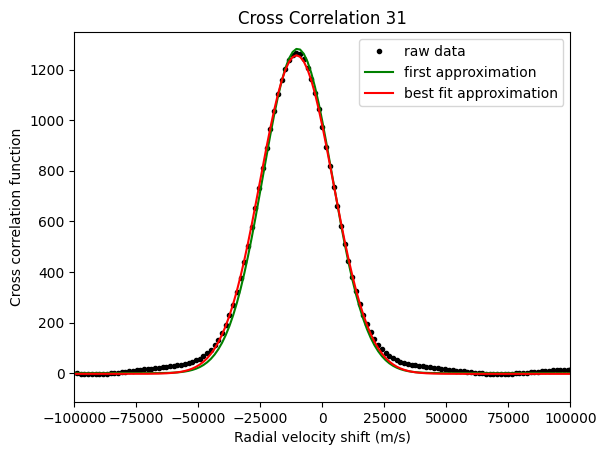

Cross Correlation 32
Optimization terminated successfully.
         Current function value: 508051.132234
         Iterations: 330
         Function evaluations: 599
chi2 = 508051.1322337573
p[0] = 46299009.165547+-174656.363271
p[1] = -10403.522733+-63.082120
p[2] = 14674.075888+-63.362451
p[3] = -2.555399+-0.361119
red chi2 = 1.002004008022691
stdev = 15.93817951074961


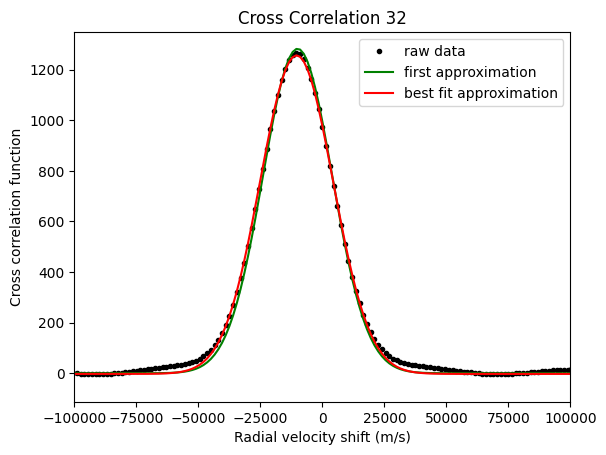

Cross Correlation 33
Optimization terminated successfully.
         Current function value: 512001.890303
         Iterations: 323
         Function evaluations: 594
chi2 = 512001.89030257857
p[0] = 46310743.924953+-175382.814327
p[1] = -10399.974186+-63.362240
p[2] = 14682.012176+-63.643971
p[3] = -2.551826+-0.362523
red chi2 = 1.0020040080230714
stdev = 16.00002953595053


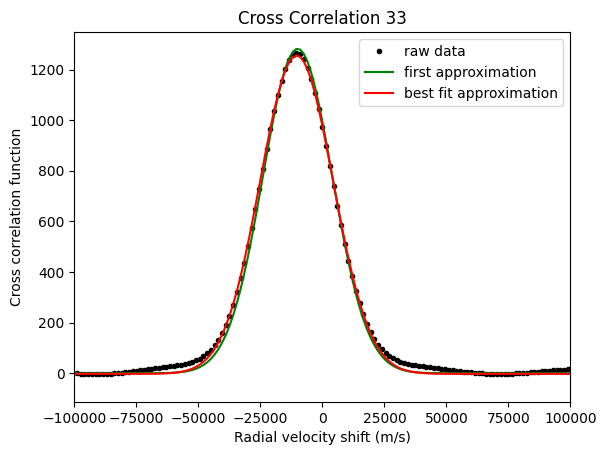

Cross Correlation 34
Optimization terminated successfully.
         Current function value: 511493.484217
         Iterations: 346
         Function evaluations: 634
chi2 = 511493.48421672196
p[0] = 46313633.096026+-175272.615540
p[1] = -10398.539508+-63.302442
p[2] = 14678.243572+-63.583833
p[3] = -2.575389+-0.362342
red chi2 = 1.0020040080228412
stdev = 15.992083732533452


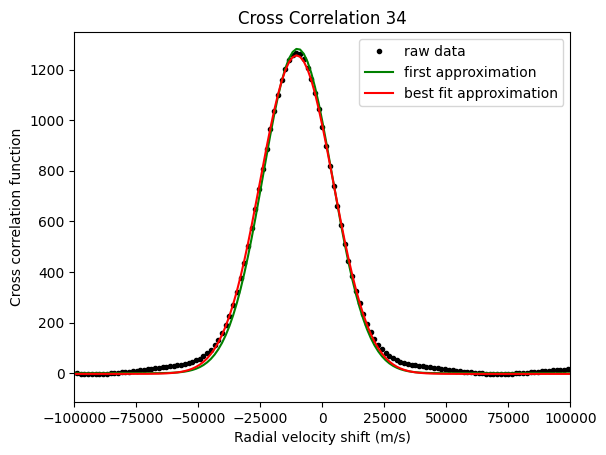

Cross Correlation 35
Optimization terminated successfully.
         Current function value: 510000.951625
         Iterations: 313
         Function evaluations: 586
chi2 = 510000.95162477734
p[0] = 46329797.987513+-175023.218122
p[1] = -10390.743954+-63.194830
p[2] = 14679.307182+-63.475765
p[3] = -2.547897+-0.361813
red chi2 = 1.0020040080232078
stdev = 15.968734320928151


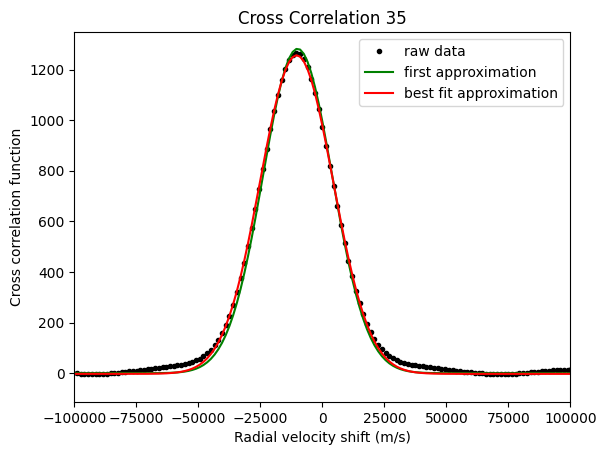

Cross Correlation 36
Optimization terminated successfully.
         Current function value: 509132.028030
         Iterations: 308
         Function evaluations: 575
chi2 = 509132.0280296081
p[0] = 46300197.245260+-174839.105162
p[1] = -10392.245753+-63.144451
p[2] = 14673.592864+-63.425048
p[3] = -2.530794+-0.361503
red chi2 = 1.0020040080231551
stdev = 15.955125007808746


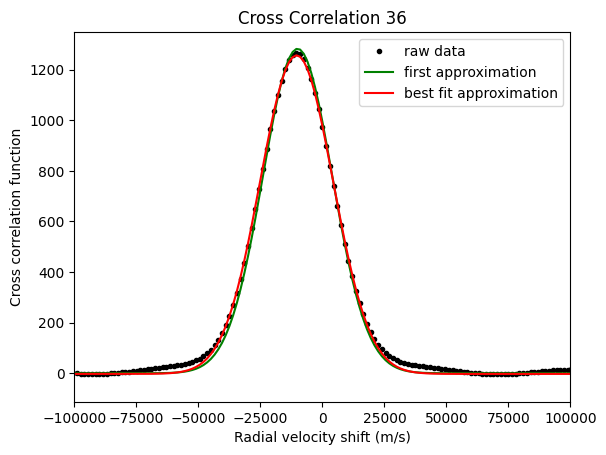

Cross Correlation 37
Optimization terminated successfully.
         Current function value: 512548.450740
         Iterations: 320
         Function evaluations: 590
chi2 = 512548.45074006135
p[0] = 46318539.245637+-175467.068269
p[1] = -10403.667310+-63.375530
p[2] = 14680.490908+-63.657291
p[3] = -2.514771+-0.362716
red chi2 = 1.002004008022475
stdev = 16.00856724913353


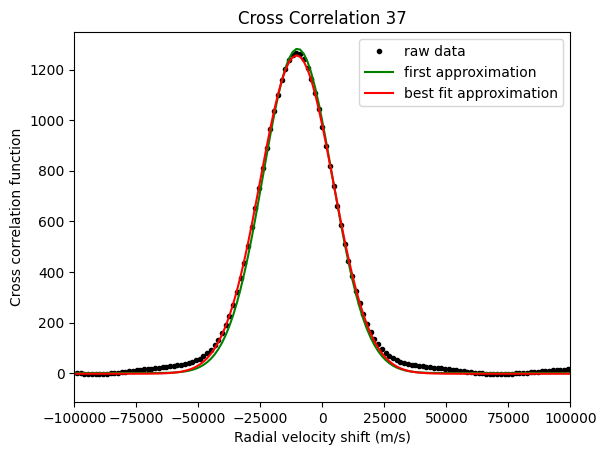

Cross Correlation 38
Optimization terminated successfully.
         Current function value: 510941.703632
         Iterations: 330
         Function evaluations: 597
chi2 = 510941.7036320772
p[0] = 46286769.717331+-175124.906411
p[1] = -10405.500230+-63.248912
p[2] = 14669.571300+-63.529897
p[3] = -2.530755+-0.362143
red chi2 = 1.0020040080220378
stdev = 15.983455565553983


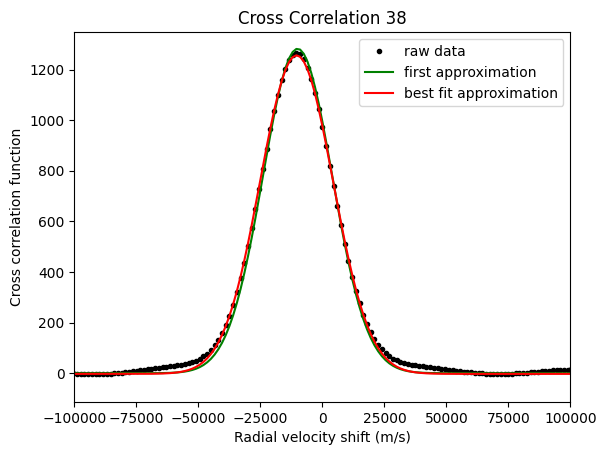

Cross Correlation 39
Optimization terminated successfully.
         Current function value: 511019.978673
         Iterations: 283
         Function evaluations: 536
chi2 = 511019.9786727811
p[0] = 46295749.602356+-175147.226781
p[1] = -10413.656891+-63.250879
p[2] = 14671.023487+-63.531899
p[3] = -2.511951+-0.362172
red chi2 = 1.002004008022258
stdev = 15.984679832151489


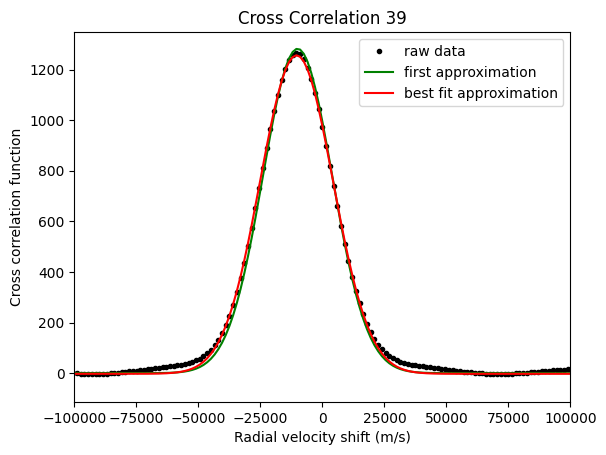

Cross Correlation 40
Optimization terminated successfully.
         Current function value: 513948.625626
         Iterations: 310
         Function evaluations: 588
chi2 = 513948.625626342
p[0] = 46293316.904526+-175660.781918
p[1] = -10425.879215+-63.448277
p[2] = 14673.039914+-63.730214
p[3] = -2.540785+-0.363209
red chi2 = 1.002004008022538
stdev = 16.03041836051608


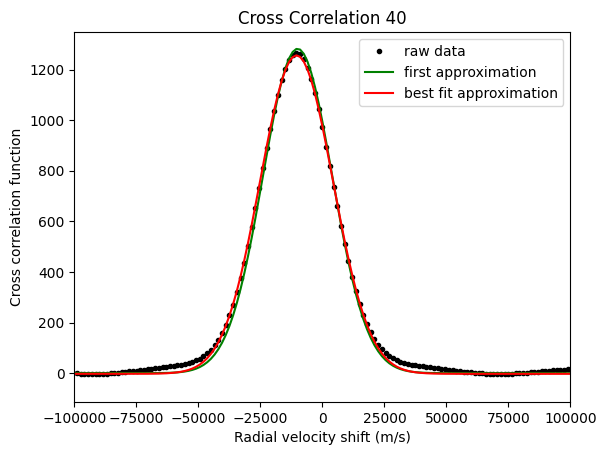

In [ ]:
#let's define the model (Gaussian)
peak_list = []
std_list = []

def model(p,x):
    """
    p is now the vector of paramters - previouly theta - just to simplify things

    p[0] is the amplitude.
    p[1] is the mean.
    p[2] is the standard deviation.
    p[3] is a vertical offset.

    m(x) = p_0 \exp(-\frac{(x-p_1)^2}{2p_2^2}) + p_3
    """
    f_model = p[0]*np.exp(-(x-p[1])**2/(2*p[2]**2)) / (np.sqrt(2 * np.pi) * p[2]) + p[3]

    return f_model

#we also need to define a merit function, let's use chi2, but ignore the uncertainties (i.e. set sigma=1)
def chi2(p,model, x,y):
    """
    chi2 = sum( (y - m(theta,x))^2 )
    """
    return np.sum((y - model(p,x))**2)


#first, let's define an initial guess for our parameter vector
p0 = np.array([4.5e7, -10000, 14000, 0])


#plot the data + guess for all 40 spectra
for i in range(num_spectra):
    graph_number = i + 1
    print(f"Cross Correlation {graph_number}")

    p_fit = opt.fmin(chi2,p0,(model,velocity,correlation_results[i]))

    print("chi2 =", chi2(p_fit,model, velocity,correlation_results[i]))
    #the chi2 has improved a lot from our fit!


    def residuals(p,f,x,y,s=1):
        """
        define residuals for a model fit
        """
        return (y - f(p,x)) / s

    r = residuals(p_fit,model,velocity,correlation_results[i])
    RMS = np.std(r)

    #re-run the least_squares algorithm with this estimate for the noise
    result = opt.least_squares(residuals,p0,args=(model,velocity,correlation_results[i],RMS))

    #the shape of the hessian should now be ok
    p_fit = result.x
    H = np.dot(result.jac.T,result.jac) #estimate the hessian matrix

    # K_fit = np.linalg.inv(H) #covariance matrix
    # pseudo-inverse instead of the regular inverse in case it is singular matrix
    K_fit = np.linalg.pinv(H) #covariance matrix

    e_fit = np.sqrt(np.diag(K_fit)) #stdevs
    std_list.append(e_fit[1])  # error for the mean

    #let's print out our parameters:
    for n in range(p_fit.size):
        print("p[{}] = {:3f}+-{:3f}".format(n,p_fit[n],e_fit[n]))

    #and let's check the reduced chi2 makes sense now
    print("red chi2 =", np.sum(residuals(p_fit, model, velocity, correlation_results[i],RMS)**2) / (velocity.size - len(p_fit)))
    #looks pretty good now!

    print("stdev =",RMS)


    plt.figure()
    plt.plot(velocity,correlation_results[i],'k.', label = "raw data")
    plt.plot(velocity,model(p0,velocity),'g-', label = "first approximation")
    plt.plot(velocity,model(p_fit,velocity),'r-', label = "best fit approximation")
    plt.xlim(-1e5, 1e5)
    plt.title(f"Cross Correlation {graph_number}")
    plt.xlabel("Radial velocity shift (m/s)")
    plt.ylabel("Cross correlation function")
    plt.legend()
    plt.show()
    peak_list.append(p_fit[1])

For each spectrum, use the cross-correlation method to determine the velocity shift as a
function of time. Plot up your RV curve. What does it look like?

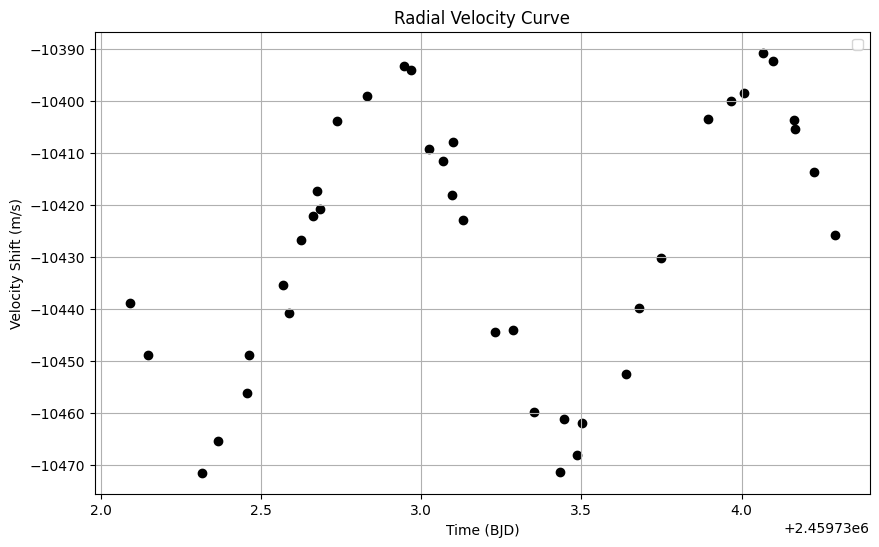

In [ ]:
# Plot the radial velocity curve
plt.figure(figsize=(10, 6))

plt.scatter(times_BJD, peak_list, color = 'black')
plt.xlabel('Time (BJD)')
plt.ylabel('Velocity Shift (m/s)')
plt.title('Radial Velocity Curve')
plt.grid(True)
plt.legend()
plt.show()

## Task 3:

The RV curve consists of velocity shifts as a function of time. Fit the data with a
suitable sinusoidal function to determine K$_{\star}$ and measure the planet’s minimum mass
($M_p \sin{i}$). Is this a linear or non-linear model? Note that the stellar system’s barycentre
may be moving towards or away from us, so you also want to fit for an offset to account for
the systemic velocity. What is the value of the systemic velocity? Take particular care when
determining the uncertainties. Can you trust the uncertainties from the cross-correlation?
You might want to make a plot of the “phase-folded” RV curve, i.e. present all your data covering a single orbital period.

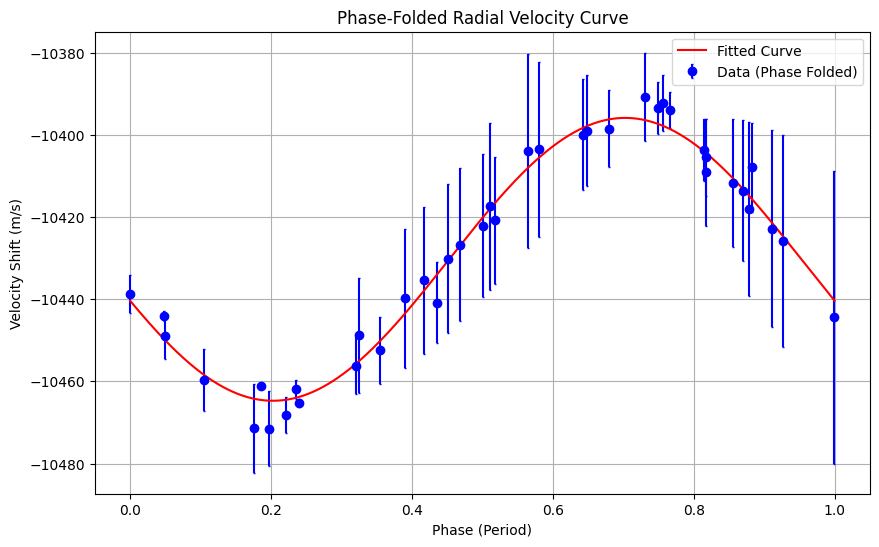

Fitted Parameters:
K = 34.403780877917136
P = 1.1417333485573875
phi = 122.63551380876694
v0 = -10430.311761871302
RMS of residuals: 16.03041836051608


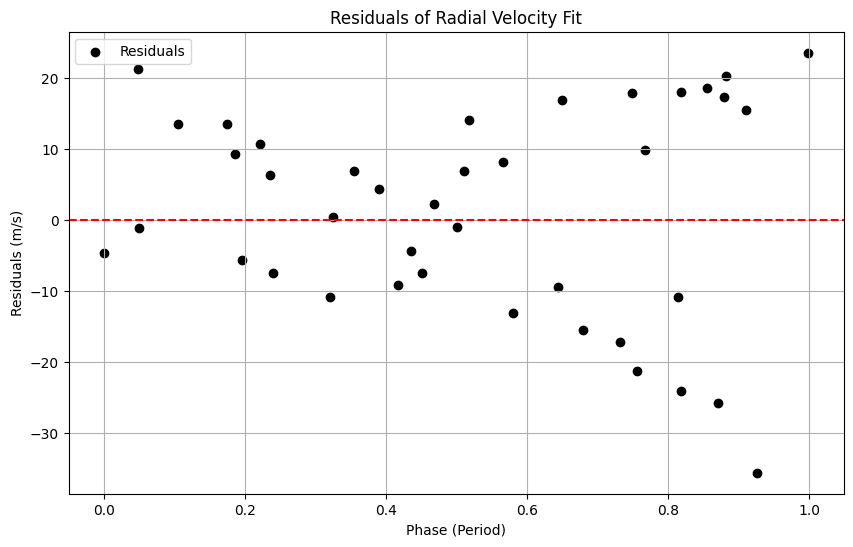

Minimum mass: 7.332619984832881e+25 kg
Minimum mass = 7.33e+25 kg 

Systemic velocity (v0) = -10430.311761871302 ± 0.6467449830422267 m/s
The systemic velocity (v0) = -10430.31 ± 0.65 m/s


In [ ]:
def sinusoidal_model(t, K, P, phi, v0):
    """
    Sinusoidal model for radial velocity curve.

    t: Time array.
    K: Radial velocity semi-amplitude.
    P: Orbital period.
    phi: Phase shift.
    v0: Systemic velocity.

    Returns model radial velocity values.
    """
    return K * np.sin((2 * np.pi * t) / P + phi) + v0


# Turn into phase-fold where phase is wrapped in the range [0, 1)
T0 = min(times_BJD)
phase = ((times_BJD - T0) / P) % 1

# Sort phase for smooth plotting
sorted_indices = np.argsort(phase)
phase_sorted = phase[sorted_indices]
peak_list_sorted = np.array(peak_list)[sorted_indices]

# Sort phase for errorbar
std_list = np.array(std_list)
std_sorted = std_list[sorted_indices]

# Initial guesses for parameters
initial_guesses = [100000, P, 2 * np.pi , -10400]  # K, P, phi, v0
# Taking phi = 2pi as the sinusoidal region has a phase shift of 2pi, if not we would obtain negative amplitude


# Perform fitting
popt, pcov = curve_fit(sinusoidal_model, times_BJD, peak_list, p0=initial_guesses, maxfev = 10000)


# Extract fitted parameters
K_fit, P_fit, phi_fit, v0_fit = popt

t_fine = np.linspace(0, 1, 1000)  # Fine grid for smooth plotting

fitted_sine_model = sinusoidal_model(t_fine * P_fit + T0, K_fit, P_fit, phi_fit, v0_fit)


# Calculate residuals in "phase space"
residuals = peak_list_sorted - sinusoidal_model(phase_sorted, K_fit, P_fit, phi_fit, v0_fit)
residuals_phase_sorted = residuals[sorted_indices]

# Calculate RMS of residuals
#RMS_residuals = np.std(residuals_phase_sorted)

# Plot the phase-folded radial velocity curve
plt.figure(figsize=(10, 6))

# Plot the data points against phase
plt.errorbar(phase_sorted, peak_list_sorted, yerr = np.abs(residuals), label='Data (Phase Folded)', fmt='o', color='blue', capsize = 1)

# Plot the fitted sinusoidal model over the phase
plt.plot(t_fine, fitted_sine_model, label='Fitted Curve', color='red')


#plt.errorbar(times_BJD, peak_list, yerr=std_list, fmt='.k', label='Velocity shifts', capsize = 2)
plt.xlabel('Phase (Period)')
plt.ylabel('Velocity Shift (m/s)')
plt.title('Phase-Folded Radial Velocity Curve')
plt.grid(True)
plt.xlim()
plt.legend()
plt.show()


# Print the fitted parameters and residuals
print(f"Fitted Parameters:\nK = {K_fit}\nP = {P_fit}\nphi = {phi_fit}\nv0 = {v0_fit}")
print(f"RMS of residuals: {RMS}")

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(phase_sorted, residuals_phase_sorted, marker='o', color='black', label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Phase (Period)')
plt.ylabel('Residuals (m/s)')
plt.title('Residuals of Radial Velocity Fit')
plt.grid(True)
plt.legend()
plt.show()


# Given that K_star = K_fit = -36.52, then find the planets minimum mass
K_star = K_fit
Mpsini = K_star * ((M_star) ** (2/3)) * ((P * 86400) / (2*np.pi * G)) ** (1/3)  # minimum mass of planet
print(f"Minimum mass: {Mpsini} kg")
print(f"Minimum mass = 7.33e+25 kg \n")


# Find systemic velocity and uncertainties for v0
perr = np.sqrt(np.diag(pcov))  # uncertainties for K_fit, P_fit, phi_fit, and v0_fit
v0_uncertainty = perr[3]  # Uncertainty for v0_fit (systemic velocity)
print(f"Systemic velocity (v0) = {v0_fit} ± {v0_uncertainty} m/s")
print(f"The systemic velocity (v0) = {v0_fit:.2f} ± {v0_uncertainty:.2f} m/s")

In [ ]:
# Given that K_star = K_fit = -36.52, then find the planets minimum mass
K_star = K_fit
print(f"K_star = {K_star}")
Mpsini = K_star * ((M_star) ** (2/3)) * ((P * 86400) / (2*np.pi * G)) ** (1/3)

# Uncertainty of planet minium mass is the same as that for K_star which was already stored in perr[0] as the rest of quantities are all provided
Mpsini_uncertainty = perr[0] # uncertainty for Mpsini
# minimum mass of planet
print(f"Minimum mass: {Mpsini:.2e} ± {Mpsini_uncertainty:.2e} kg")


# Find systemic velocity and uncertainties for v0
perr = np.sqrt(np.diag(pcov))  # uncertainties for K_fit, P_fit, phi_fit, and v0_fit
v0_uncertainty = perr[3]  # Uncertainty for v0_fit (systemic velocity)
print(f"The systemic velocity (v0): {v0_fit:.2f} ± {v0_uncertainty:.2f} m/s")

K_star = 34.403780877917136
Minimum mass: 7.33e+25 ± 2.90e+05 kg
The systemic velocity (v0): -10430.31 ± 0.65 m/s


## Task 2:
Download the transit data. The time [in BJD] and flux are simply given by ‘time’ and
‘flux’ within the dataset. Plot up the transit and make sure the data make sense.

Then, create a function to produce a transit model, as outlined above. Fit the transit using the model using a suitable algorithm. Try and determine the planet radius, as well as other transit parameters. Make a nice plot of the transit fit. You may also want to show the residuals to show that the fit is good.

NpzFile '/content/JSAstroLab2024_25_transit_data_22340134.npz' with keys: time, flux, P
Keys of transit_data: ['time', 'flux', 'P']
Shape of t_transit: (320,)
Shape of f_transit: (320,)
Shape of P: ()
Period: 1.1417245433521015


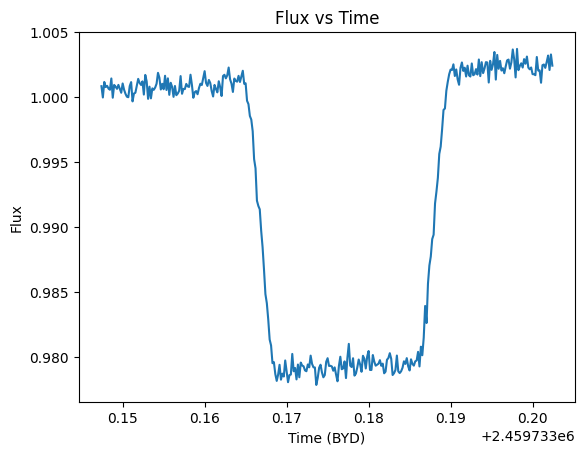

In [ ]:
# Load transit data
transit_data = np.load("/content/JSAstroLab2024_25_transit_data_22340134.npz")

print(transit_data)

# Print components of transit data
print(f"Keys of transit_data: {transit_data.files}")

# Extract time and flux arrays
t_transit, f_transit, P = transit_data['time'], transit_data['flux'], transit_data['P']


# Print the shapes of the arrays
print(f"Shape of t_transit: {t_transit.shape}")  # 320 data points of time and flux
print(f"Shape of f_transit: {f_transit.shape}")
print(f"Shape of P: {P.shape}")
print(f"Period: {P}")

# Plot transit
plt.plot(t_transit, f_transit)
plt.xlabel('Time (BYD)')
plt.ylabel('Flux')
plt.title('Flux vs Time')
plt.show()


<ipython-input-54-12c830774c2b>:11: RuntimeWarning: invalid value encountered in arccos
  k0 = np.arccos((rho**2 + z**2 - 1) / (2 * rho * z))
<ipython-input-54-12c830774c2b>:12: RuntimeWarning: invalid value encountered in arccos
  k1 = np.arccos((-rho**2 + z**2 + 1) / (2 * z))
<ipython-input-54-12c830774c2b>:16: RuntimeWarning: invalid value encountered in sqrt
  f = (1 - (1 / np.pi) * (rho**2 * k0 + k1 - np.sqrt((4 * z**2 - (1 + z**2 - rho**2)**2) / 4))) * baseline


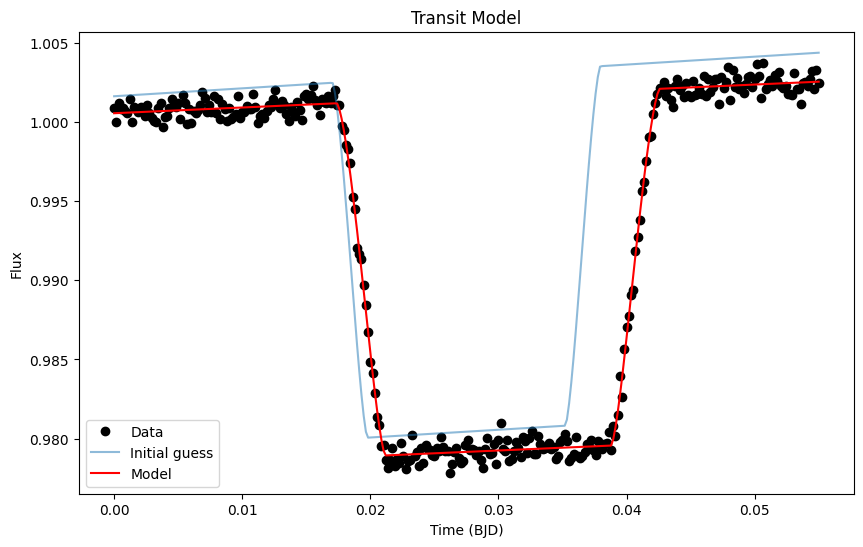

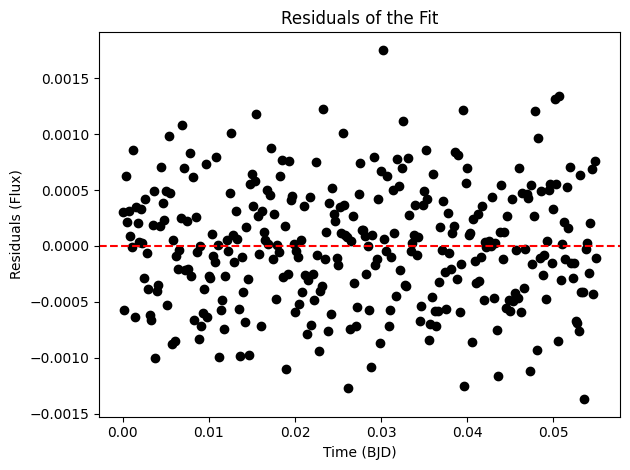

In [ ]:
def transit_model(p, t):
    T0, P, a_Rstar, rho, inclination, f_oot, T_grad = p

    baseline = f_oot + T_grad * (t-T0)

    # Orbital phase
    phi = (2 * np.pi) / P * (t - T0) # phi is calculated for the entire t array

    z = a_Rstar * np.sqrt(np.sin(phi)**2 + (np.cos(inclination) * np.cos(phi))**2)

    k0 = np.arccos((rho**2 + z**2 - 1) / (2 * rho * z))
    k1 = np.arccos((-rho**2 + z**2 + 1) / (2 * z))

    f = np.ones(t.size)

    f = (1 - (1 / np.pi) * (rho**2 * k0 + k1 - np.sqrt((4 * z**2 - (1 + z**2 - rho**2)**2) / 4))) * baseline

    f[z <= 1 - rho] = (1-rho**2) * baseline[z <= 1 - rho]
    f[z > 1 + rho] = 1* baseline[z > 1 + rho]

    return f

t_transit = t_transit - t_transit[0]  # relative time



# Initial guesses
T0 = np.median(t_transit)
a_Rstar = 20
rho = 0.15
inclination = np.pi/2
f_oot = 1.003
T_grad = 0.05

p = [T0, P, a_Rstar, rho, inclination, f_oot, T_grad]
initial_guesses = [T0 , P, a_Rstar, rho, inclination, f_oot, T_grad]  # T0, P, a_Rstar, rho, i, f_oot, T_grad

# Perform fitting
#first, define our residuals function
def residuals(p,f,x,y,s=1):
    """
    define residuals for a model fit
    """
    return (y - f(p,x)) / s

result = opt.least_squares(residuals,initial_guesses,args=(transit_model,t_transit,f_transit))
p_fit = result.x

# Calculate covariance matrix and uncertainties
H = np.dot(result.jac.T,result.jac) #estimate the hessian matrix
cov_matrix = np.linalg.inv(H) #covariance matrix
param_uncertainties = np.sqrt(np.diag(cov_matrix)) #stdevs

# Extract fitted parameters and their uncertainties
T0_fit, P_fit, a_Rstar_fit, rho_fit, inclination_fit, f_oot_fit, T_grad_fit = p_fit
T0_err, P_err, a_Rstar_err, rho_err, inclination_err, f_oot_err, T_grad_err = param_uncertainties


# Calculate residuals (observed - model)
residuals = f_transit - transit_model(p_fit, t_transit)

# Calculate RMS of residuals
RMS_residuals = np.std(residuals)

# Plot the radial velocity curve
plt.figure(figsize=(10, 6))

plt.plot(t_transit, f_transit, label='Data', marker='o', linestyle='', color = "black")
plt.plot(t_transit, transit_model(initial_guesses, t_transit), label = 'Initial guess', alpha = 0.5)
plt.plot(t_transit, transit_model(p_fit, t_transit), label='Model', linestyle='-', color = 'red')
plt.xlabel('Time (BJD)')
plt.ylabel('Flux')
plt.title('Transit Model')
plt.legend()
plt.show()

# Plot residuals
plt.plot(t_transit, residuals, label='Residuals', marker='o', linestyle='', color='black')
plt.axhline(0, color='red', linestyle='--')  # Horizontal line at zero for reference
plt.xlabel('Time (BJD)')
plt.ylabel('Residuals (Flux)')
plt.title('Residuals of the Fit')

plt.tight_layout()  # Adjust the spacing between the two plots
plt.show()

### Determine the planet's radius

In [ ]:
# Print fitted parameters and uncertainties
print(f"T0_fit: {T0_fit:.5f} ± {T0_err:.5f}")
print(f"P_fit: {P_fit:.5f} ± {P_err:.5f}")
print(f"a_Rstar_fit: {a_Rstar_fit:.3f} ± {a_Rstar_err:.3f}")
print(f"rho_fit: {rho_fit:.3f} ± {rho_err:.3f}")
print(f"inclination_fit: {inclination_fit:.5f} ± {inclination_err:.5f}")
print(f"f_oot_fit: {f_oot_fit:.5f} ± {f_oot_err:.5f}")
print(f"T_grad_fit: {T_grad_fit:.5f} ± {T_grad_err:.5f} \n")

# Planet radius
R_planet = rho_fit * R_star
R_planet_err = R_star * rho_err  # Simple error propagation for R_planet = rho * R_star

# Display derived quantities and uncertainties
print(f"Radius of the planet: {R_planet:.0f} ± {R_planet_err:.0f} m")
print(f"Radius of the planet: {R_planet/1000:.0f} ± {R_planet_err/1000:.0f} km \n")

T0_fit: 0.02999 ± 0.02523
P_fit: 0.11565 ± 72.88691
a_Rstar_fit: 1.798 ± 884.530
rho_fit: 0.150 ± 0.414
inclination_fit: 1.69204 ± 145.43921
f_oot_fit: 1.00164 ± 0.07754
T_grad_fit: 0.03623 ± 3.65436 

Radius of the planet: 14251535 ± 39497021 m
Radius of the planet: 14252 ± 39497 km 



## Task 4

Determine the planet's semi-major axis $a$, orbital inclination $i$, density $\rho_{planet}$, impact parameter $b$, planet's equilibrium temperature $T_{eq}$

In [ ]:
print(f"The value for a_Rstar_fit is: {a_Rstar_fit}")
# Calculate the semi-major axis
a_planet = a_Rstar_fit * R_star
a_planet_err = R_star * a_Rstar_err
print(f"Semi-major axis of the planet: {a_planet:.0f} ± {a_planet_err:.0f} m")
print(f"Semi-major axis of the planet: {a_planet/1000:.0f} ± {a_planet_err/1000:.0f} km \n")

print(f"The inclination from the fit in radians is: {inclination_fit}")
# Calculate the orbital inclination
i_planet = np.degrees(inclination_fit)
i_planet_err = np.degrees(inclination_err)
print(f"Orbital inclination: {i_planet:.2f} ± {i_planet_err:.2f} degrees \n")

# Calculate density of the planet
V_planet = (4/3) * np.pi * (R_planet)**3  # Calculate the volume of the planet
# Calculate the density of the planet
V_planet_err = V_planet * 3 * (R_planet_err / R_planet)

rho_planet = Mpsini / V_planet
rho_planet_err = rho_planet * np.sqrt((V_planet_err / V_planet)**2)
print(f"Density of the planet: {rho_planet:.1f} ± {rho_planet_err:.1f} kg/m^3 \n")

# Calculate the impact parameter
b_planet = np.abs((a_planet * np.cos(inclination_fit)) / R_star)
b_planet_err = b_planet * np.sqrt((a_planet_err / a_planet)**2 + (np.sin(inclination_fit) * inclination_err / np.cos(inclination_fit))**2)
print(f"Impact parameter of the planet: {b_planet:.3f} ± {b_planet_err:.3f} \n")

The value for a_Rstar_fit is: 1.7980878523296253
Semi-major axis of the planet: 171377371 ± 84305345291 m
Semi-major axis of the planet: 171377 ± 84305345 km 

The inclination from the fit in radians is: 1.692044917415564
Orbital inclination: 96.95 ± 8333.05 degrees 

Density of the planet: 6047.6 ± 50281.7 kg/m^3 

Impact parameter of the planet: 0.217 ± 280.774 



Some error is present in the transit modelling which cause extremely large uncertainties in the determination of the quantities found from the modelling parameters.